# Retinal OCT Images (optical coherence tomography)

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

## Context

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.

Optical coherence tomography (OCT) images (Spectralis OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

<h2> 1.2 Source / useful links </h2>

DataSource : https://www.kaggle.com/paultimothymooney/kermany2018 <br>
Citation : http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

-  No strict latency constraints.
-  Multi class classification problem.

<h2> 1.4 Loss function </h2>

- Because of multi label problem , we will use binary_crossentropy.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

### File contents
Image format: 84,495 images, 4 categories

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<p> It is a multi class classification problem, for a given image we need to predict if they are suffering from which disease. </p>

<h3> 2.2.2 Performance Metric </h3>

Metric(s): 
* Categorical Crossentropy
* Confusion Matrix

In [41]:
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

Using TensorFlow backend.


In [3]:
print(os.listdir("../input/oct2017/OCT2017 /train"))

['NORMAL', 'DRUSEN', 'CNV', 'DME']


* We have four folder which contain images of that class type.
* "NORMAL" indicates that there is no disease in the image and other category is some type of retina disease.

In [4]:
normal_len = len(os.listdir("../input/oct2017/OCT2017 /train/NORMAL"))
drusen_len = len(os.listdir("../input/oct2017/OCT2017 /train/DRUSEN"))
cnv_len = len(os.listdir("../input/oct2017/OCT2017 /train/CNV"))
dme_len = len(os.listdir("../input/oct2017/OCT2017 /train/DME"))

In [5]:
print("length of normal images = ",normal_len)
print("length of images with disease drusen = ",drusen_len)
print("length of images with disease cnv = ",cnv_len)
print("length of images with disease dme = ",dme_len)


length of normal images =  26315
length of images with disease drusen =  8616
length of images with disease cnv =  37205
length of images with disease dme =  11348


In [36]:
files = os.listdir("../input/oct2017/OCT2017 /train/NORMAL/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("../input/oct2017/OCT2017 /train/NORMAL/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DRUSEN images, they are = ",set(size))

100%|██████████| 26315/26315 [02:12<00:00, 198.49it/s]

There are different sizes of DRUSEN images, they are =  {(496, 1024, 3), (496, 1536, 3), (496, 768, 3), (496, 512, 3), (496, 384, 3), (512, 512, 3)}


In [37]:
files = os.listdir("../input/oct2017/OCT2017 /train/DRUSEN/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("../input/oct2017/OCT2017 /train/DRUSEN/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DRUSEN images, they are = ",set(size))

100%|██████████| 8616/8616 [00:46<00:00, 186.98it/s]

There are different sizes of DRUSEN images, they are =  {(496, 1024, 3), (496, 1536, 3), (496, 768, 3), (496, 512, 3)}


In [38]:
files = os.listdir("../input/oct2017/OCT2017 /train/CNV/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("../input/oct2017/OCT2017 /train/CNV/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DRUSEN images, they are = ",set(ascvbnsize))

100%|██████████| 37205/37205 [03:36<00:00, 171.61it/s]

There are different sizes of DRUSEN images, they are =  {(496, 1024, 3), (496, 384, 3), (496, 1536, 3), (496, 512, 3), (496, 768, 3)}


In [39]:
files = os.listdir("../input/oct2017/OCT2017 /train/DME/")
size = []
for i in tqdm(range(len(files))):
    img = cv2.imread("../input/oct2017/OCT2017 /train/DME/"+files[i])
    #print("image size = ",img.shape)
    size.append(img.shape)
print("There are different sizes of DRUSEN images, they are = ",set(size))

100%|██████████| 11348/11348 [01:00<00:00, 186.19it/s]

There are different sizes of DRUSEN images, they are =  {(496, 768, 3), (496, 1024, 3), (496, 512, 3), (496, 1536, 3), (512, 512, 3)}


* As we can see that the images are not in same shape. We have to bring all the images into same shape.
* We can also perform normalization in the image.
* All of these we can do using ImageDataGenerator.

In [53]:
labels = os.listdir('../input/oct2017/OCT2017 /train/')
IMG_SIZE = 224
batch_size = 16
train_data_dir = '../input/oct2017/OCT2017 /train'
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=16,
    class_mode='categorical')


Found 83484 images belonging to 4 classes.


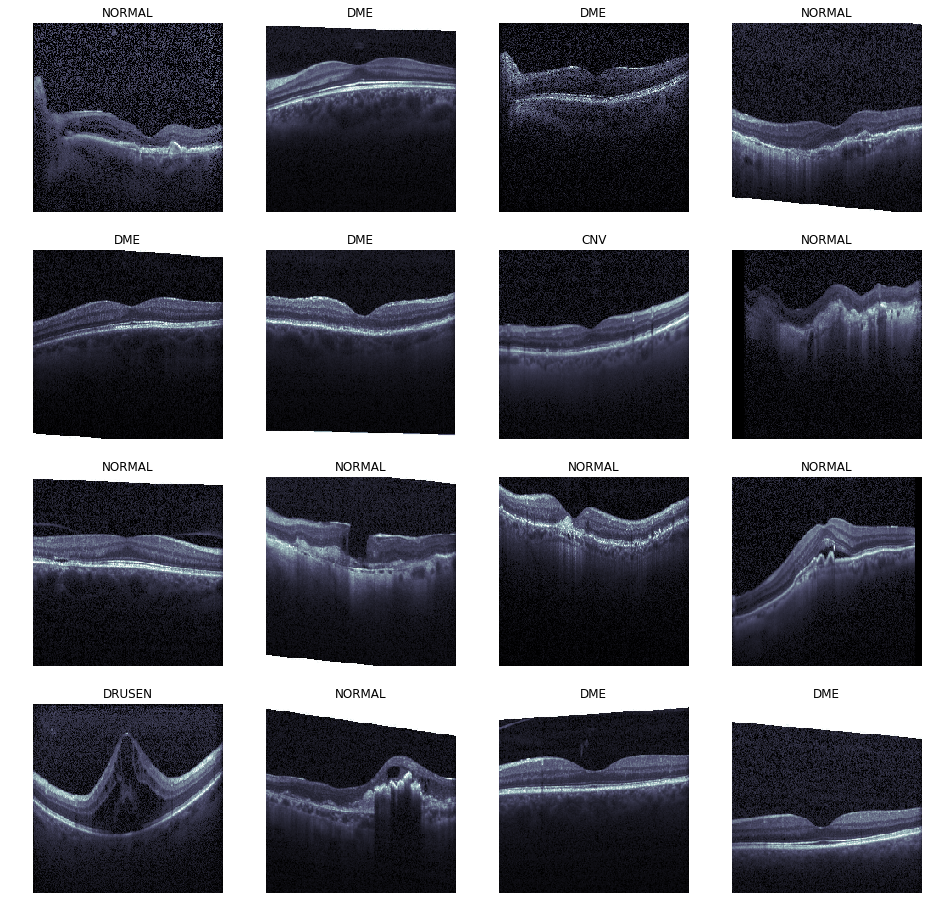

In [54]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

### Observation - 
* We have successfully bring all the images in same shape.
* We can also apply image augmentation
* Now we will use pre-trained model on this dataset.